<a href="https://colab.research.google.com/github/10zinchosang/Summer2022-DataAnalytics/blob/main/In_class_Iris_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem

The notebook MUST INCLUDE:
   * All steps necessary from the template.
   * At least 5 Data Visualizations studying the data and explanation of the graph/plot chosen.
   * A well written explanation of every model used and parameters employed.
   * A Logistic Regression Model with a least 2-3 data splits rates and explanation of the accuracy of each model.
   * A KNN Analytic model with a least 2-3 data splits rates and explanation of the accuracy of each model.  And code analysis for    choosing a 'k' value.

   * BONUS:
      * An SVC Model with a least 2-3 data splits rates and explanation of the accuracy of each model.
      * SVC explanation... (https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)

# Task 2: Load the Libraries

In [2596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Task 3: Load the Data

In [2597]:
df = pd.read_csv('https://raw.githubusercontent.com/10zinchosang/Summer2020-DataFiles/main/iris.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [2598]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2600]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2601]:
set(df['Class'].values)
# We have 3 groups for 'Class'

{'Setosa', 'Versicolor', 'Virginica'}

In [2602]:
df.isnull().value_counts()
# We have "perfect" data

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

In [2603]:
X = df.drop(['Class'], axis = 1)
X.shape

(150, 4)

In [2604]:
y = df['Class']
y.shape

(150,)

# Task 5: Data Visualization

## 1. Countplot

This is a countplot. It graphs the count for each different group within 'Class'. We can see the three groups Setosa, Versicolor, and Virginica all having 50 observations. This lets us know we have an "even" amount of data for each group in 'Class'.

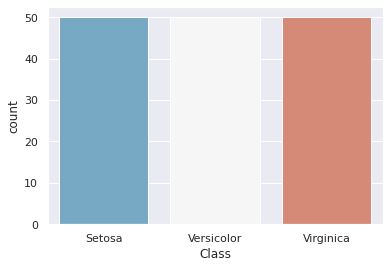

In [2605]:
sns.countplot(x='Class', data=df, palette='RdBu_r');

## 2. Boxplot

Boxplots let us know about the minimum, first quartile, median, third quartile, maximimum, and outliers for our data. In this case I looked at sepal length for the the 3 groups in 'Class'. We can see how on average Setosa has the smalled sepal lengths while Virginica has the largest. 

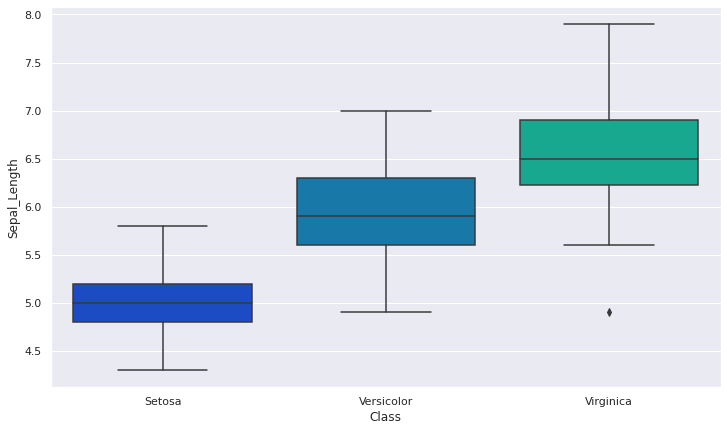

In [2606]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Class', y='Sepal_Length', data=df, palette='winter')

## 3. Scatterplot

Scatterplots let us graph two continuous variables against each other for a categorical varaible. In this case we graphed petal length against petal width for each group in 'Class'. We can see clusters easily and can notice a positive linear correlation between petal length and petal width. As petal lengths get bigger we can expect petal widths to increase as well.

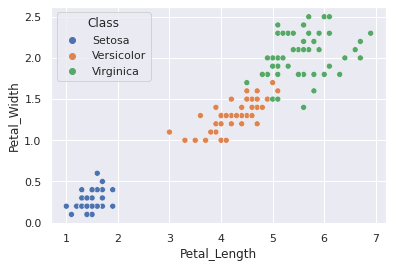

In [2607]:
sns.scatterplot(data=df, x="Petal_Length", y="Petal_Width", hue = 'Class');

## 4. Pairplot

This is a pairplot for the dataframe. We can see many relationships at the same time using this. Using hue as our 'Class' we can see some characteristics of each group. The Setosa class for example has small sepal length and width and also small petal length and width.

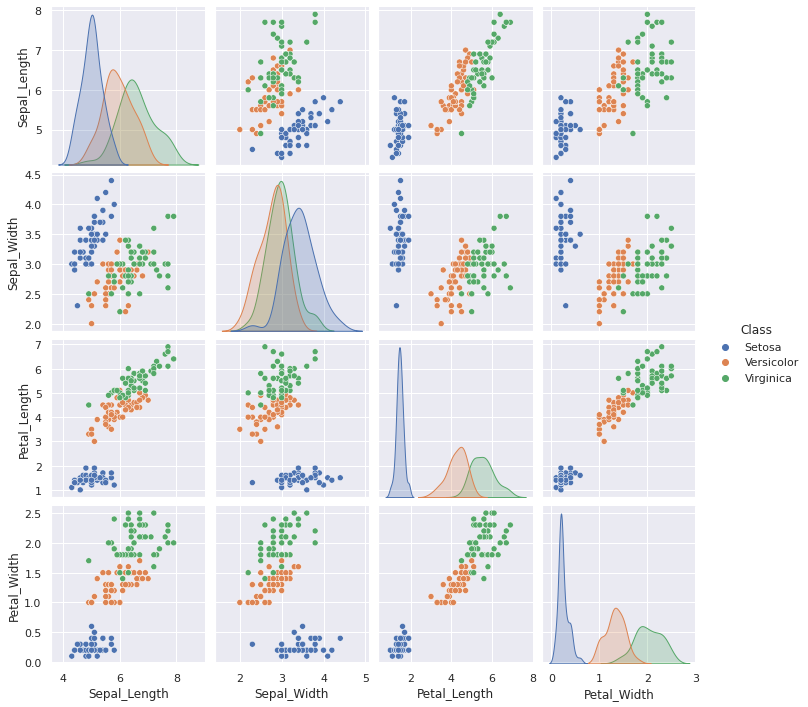

In [2672]:
sns.pairplot(df, hue = 'Class');

## 5. Heatmap

This is a heatmap of the correlations of all the features against each other. This is an easy way to find correlations within our data. For example, petal length had high positive correlation (0.96) with petal length.

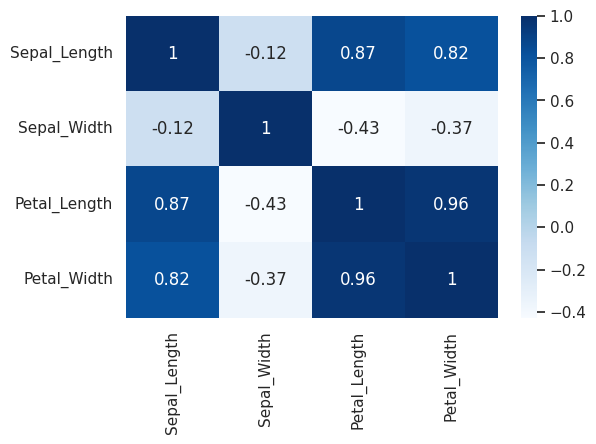

In [2673]:
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(df.corr(),annot=True,cmap='Blues');

# Task 6: Train Test Split

In [2610]:
from sklearn.model_selection import train_test_split

# Task 7: Feature Scaling

In [2611]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Task 8 and 9: Logistic Regression and KNN Algorithm

In [2612]:
from sklearn.linear_model import LogisticRegression

## 0.5 Test split

In [2613]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5)

### 0.5 scaling

In [2614]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 0.5 log model

In [2615]:
logmodel = LogisticRegression()
logmodel.fit(scaled_X_train,y_train)
predictions = logmodel.predict(scaled_X_test)

### 0.5 log model evaluation

In [2616]:
from sklearn.metrics import classification_report, confusion_matrix

In [2617]:
print((confusion_matrix(y_test,predictions)))

[[28  0  0]
 [ 0 26  1]
 [ 0  2 18]]


In [2618]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        28
  Versicolor       0.93      0.96      0.95        27
   Virginica       0.95      0.90      0.92        20

    accuracy                           0.96        75
   macro avg       0.96      0.95      0.96        75
weighted avg       0.96      0.96      0.96        75



### 0.5 KNN Error Rate

In [2619]:
from sklearn.neighbors import KNeighborsClassifier

In [2620]:
error_rate = []

# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

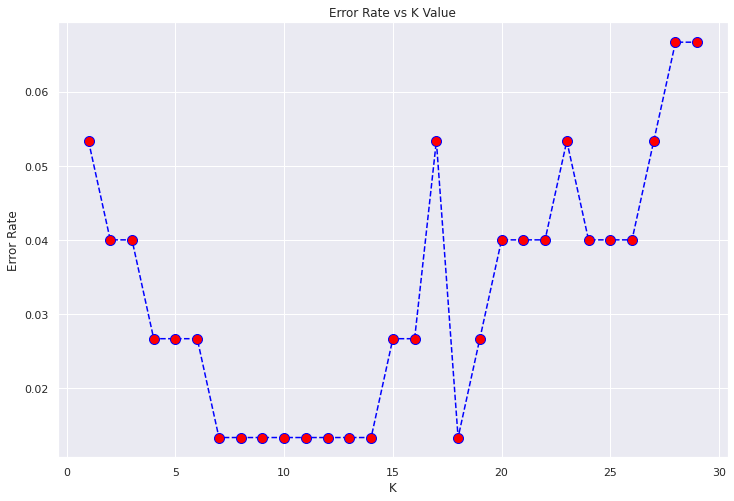

In [2621]:
plt.figure(figsize = (12,8))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### 0.5 KNN evaluation

In [2622]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [2623]:
print('With k = 10')
print((confusion_matrix(y_test,pred)))

With k = 10
[[28  0  0]
 [ 0 26  1]
 [ 0  0 20]]


In [2624]:
print('With k = 10')
print((classification_report(y_test,pred)))

With k = 10
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        28
  Versicolor       1.00      0.96      0.98        27
   Virginica       0.95      1.00      0.98        20

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



## 0.3 Test split

In [2625]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

### 0.3 scaling

In [2626]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 0.3 log model

In [2627]:
logmodel = LogisticRegression()
logmodel.fit(scaled_X_train,y_train)
predictions = logmodel.predict(scaled_X_test)

### 0.3 log model evaluation

In [2628]:
print((confusion_matrix(y_test,predictions)))

[[17  0  0]
 [ 0 15  1]
 [ 0  0 12]]


In [2629]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      0.94      0.97        16
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 0.3 KNN Error Rate

In [2630]:
error_rate = []

# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

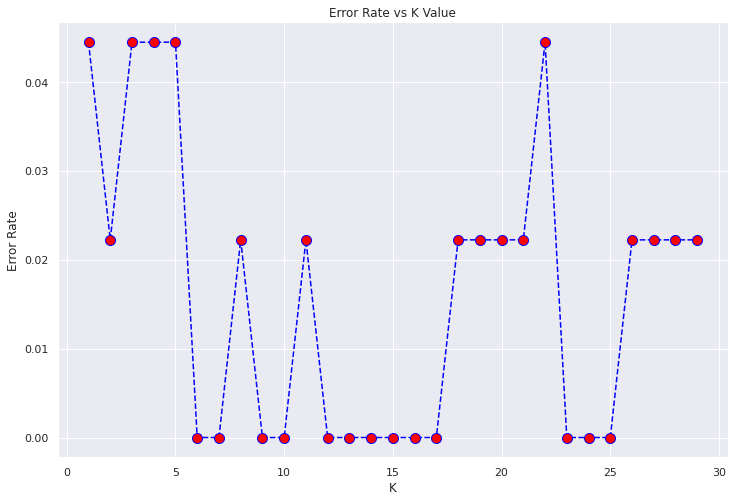

In [2631]:
plt.figure(figsize = (12,8))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### 0.3 KNN evaluation

In [2632]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [2633]:
print('With k = 12')
print((confusion_matrix(y_test,pred)))

With k = 12
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]


In [2634]:
print('With k = 12')
print((classification_report(y_test,pred)))

With k = 12
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      1.00      1.00        16
   Virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 0.1 Test split

In [2635]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)

### 0.1 scaling

In [2636]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 0.1 log model

In [2637]:
logmodel = LogisticRegression()
logmodel.fit(scaled_X_train,y_train)
predictions = logmodel.predict(scaled_X_test)

### 0.1 log model evaluation

In [2638]:
print((confusion_matrix(y_test,predictions)))

[[6 0 0]
 [0 5 0]
 [0 0 4]]


In [2639]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00         5
   Virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### 0.1 KNN Error Rate

In [2640]:
error_rate = []

# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

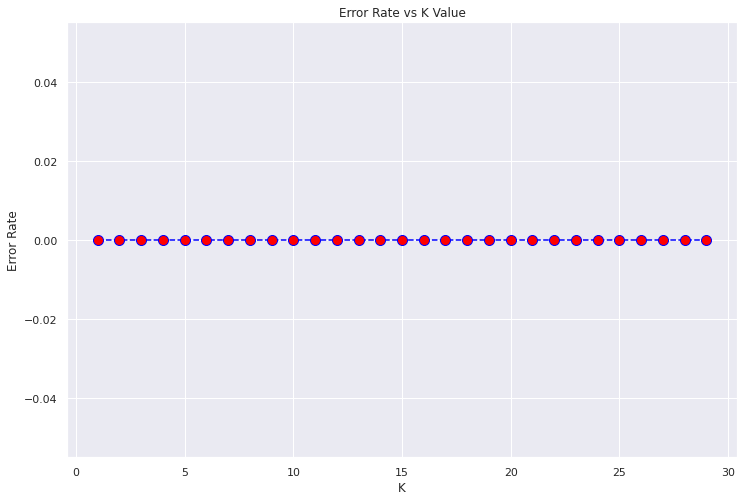

In [2641]:
plt.figure(figsize = (12,8))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### 0.1 KNN evaluation

In [2642]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [2643]:
print('With k = 3')
print((confusion_matrix(y_test,pred)))

With k = 3
[[6 0 0]
 [0 5 0]
 [0 0 4]]


In [2644]:
print('With k = 3')
print((classification_report(y_test,pred)))

With k = 3
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00         5
   Virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## Logistic Explanation

Our model predictions had 96% accuracy for 0.5 test size, 98% for 0.3 test size, and 100% for 0.1 test size. 

Our accuracy should increase as we decrease the test size. 

This is because as our training size gets bigger, the model will understand our data too well. 

This results in higher accuracies for predicting the test sample aka "overfitting". 

Test size of 0.5 should usually "underfit" our data, but because we had such a small amount of data it still had remarkably high accuracy.

## KNN Algorithm Explanation

I found the KNN Error Rate for values of n from 1 to 30 for each split that I did: 0.5, 0.3, and 0.1. 

The error rate graphs had minimums at n = 10, 12, and 3 respectively for splits 0.5, 0.3, and 0.1 so I used those. 

They all had incredibly high accuracy. 

A larger dataset with more observations could give us more variations.

# Task 10: SVC Model

In [2651]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5)

### 0.5 split

In [2660]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [2661]:
prediction = clf.predict(X_test)

In [2664]:
print((confusion_matrix(y_test,prediction)))

[[27  0  0]
 [ 0 22  0]
 [ 0  3 23]]


In [2665]:
print((classification_report(y_test,prediction)))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        27
  Versicolor       0.88      1.00      0.94        22
   Virginica       1.00      0.88      0.94        26

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



96% accuracy

### 0.1 split

In [2666]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)

In [2668]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [2669]:
prediction = clf.predict(X_test)

In [2670]:
print((confusion_matrix(y_test,prediction)))

[[3 0 0]
 [0 7 0]
 [0 0 5]]


In [2671]:
print((classification_report(y_test,prediction)))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         3
  Versicolor       1.00      1.00      1.00         7
   Virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



100% accuracy because of overfitting